# **Logistic Regression**

In [ ]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Data Cleaning

In [ ]:
# import the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# handle null and unimportant values
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df['Age'] = df['Age'].bfill() # fillna(int(df['Age'].mean()))
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# mapping
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

### Binary Classification

In [ ]:
# train test split
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# handeling outliers
cols = ['Age', 'SibSp', 'Parch']
train_df = pd.concat([X_train, y_train], axis=1)

dbscan = DBSCAN(eps=5, min_samples=14)
train_df['labels'] = dbscan.fit_predict(X_train[cols])

outliers = train_df[train_df['labels'] == -1].index
print('number of outliers: ', len(outliers))

train_df = train_df.drop(outliers)
X_train_cleaned = train_df.drop(['labels', 'Survived'], axis=1)
y_train_cleaned = train_df['Survived']

number of outliers:  8


In [ ]:
# build model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_cleaned, y_train_cleaned) # y_train_cleaned

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

results = classification_report(y_test, y_pred)
print('classification report:\n', results)

classification report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       134
           1       0.76      0.72      0.74        89

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



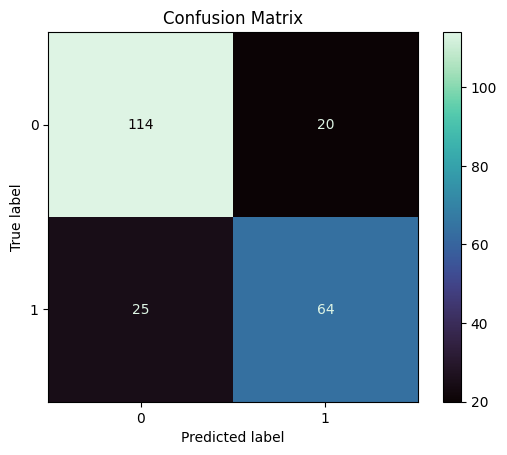

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap=sns.color_palette('mako', as_cmap=True))
plt.title('Confusion Matrix')
plt.show()